In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

from scipy.io import loadmat # by using it I can open the files with extend mat
from sklearn import svm

In [2]:
##to modify some display options for pandas DataFrames
#hen this option is True (which is the default), pandas will display DataFrames as HTML tables in the notebook
pd.set_option('display.notebook_repr_html',False)
#By default, pandas will display a maximum of 20 columns of a DataFrame. However, by setting it to None, pandas will display all columns of a DataFrame, regardless of the number
pd.set_option('display.max_columns',None)
#Setting it to 150 means that pandas will display up to 150 rows before truncating or summarizing the output.
pd.set_option('display.max_rows',150)
# By setting it to None, pandas will display all items without truncating or summarizing.
pd.set_option('display.max_seq_item',None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#functions
def plotData(X,y,S):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()

    plt.scatter(X[pos,0], X[pos,1], s=S, c = 'b', marker = '+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=S, c = 'r', marker = 'o', linewidths=1)

In [5]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
  x_min,x_max = X[:,0].min()-pad,X[:,0].max()+pad
  y_min,y_max = X[:,1].min()-pad,X[:,1].max()+pad
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  Z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z, cmap=plt.cm.Paired,alpha=0.2)

  plotData(X,y,6)

  sv = svc.support_vectors_
  plt.scatter(sv[:,0],sv[:,1],c='y', marker='|', s=100, linewidths=5)
  plt.xlim(x_min,x_max)
  plt.ylim(y_min,y_max)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.show()
  print('Number of support vectors: ',svc.support_.size)

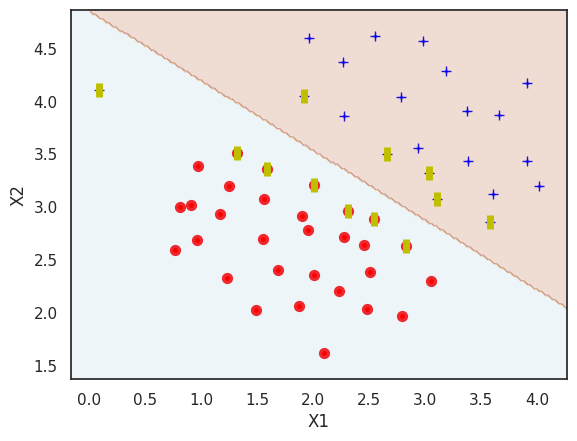

Number of support vectors:  12


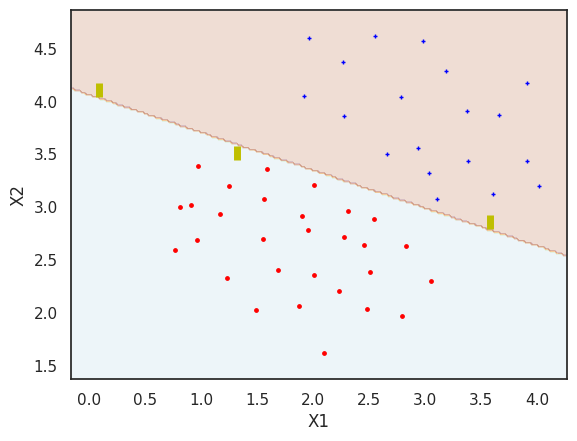

Number of support vectors:  3


In [6]:
#--------------example1-linear SVM ---------------#
data1 = loadmat("/content/drive/MyDrive/dataset/ex6data1.mat")
#print(data1)

y1 = data1['y']
X1 = data1['X']

#data before classifying
plotData(X1,y1,50)

#small C == UF
clf = svm.SVC(C=1.0, kernel= 'linear')
clf.fit(X1,y1.ravel())
plot_svc(clf,X1,y1)

#big C == OF
clf.set_params(C=100)
clf.fit(X1,y1.ravel())
plot_svc(clf,X1,y1)

X2:  (863, 2)
y2:  (863, 1)


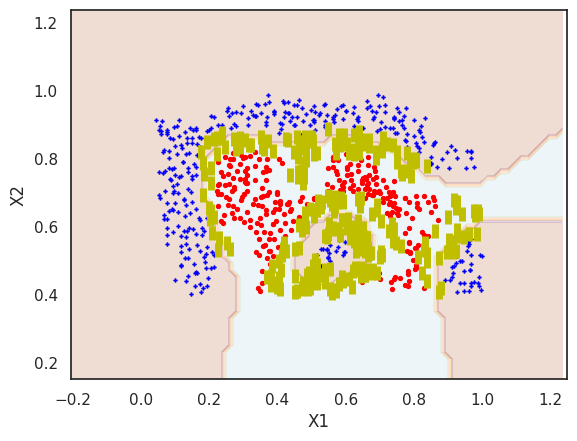

Number of support vectors:  254


In [13]:
#--------example2 non linear SVM------------#
data2 = loadmat('/content/drive/MyDrive/dataset/ex6data2.mat')
#print(data2.keys())

y2 = data2['y']
X2 = data2['X']

print('X2: ',X2.shape)
print('y2: ',y2.shape)

plotData(X2,y2,8)
#apply SVM
clf2 = svm.SVC(C=50, kernel='rbf',gamma=6) #rbf: are using for curvy data, #gamma: variable of curvature
clf2.fit(X2,y2.ravel())
plot_svc(clf2,X2,y2)


X3:  (211, 2)
y3:  (211, 1)


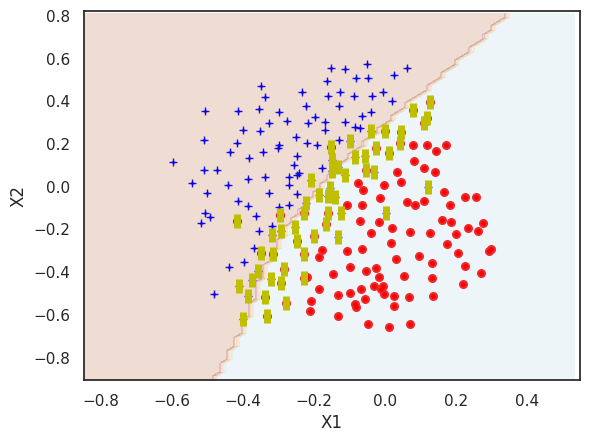

Number of support vectors:  55


In [17]:
#---------example3 Nonlinear SVM------#
data3 = loadmat('/content/drive/MyDrive/dataset/ex6data3.mat')
#print(data1.keys())

y3 = data3['y']
X3 = data3['X']

print("X3: ",X3.shape)
print("y3: ",y3.shape)

plotData(X3, y3, 30)

clf3 = svm.SVC(C = 1.0, kernel = 'poly', degree = 3, gamma = 10) #poly: polynomial
clf3.fit(X3,y3.ravel())
plot_svc(clf3, X3, y3)

In [18]:
#Training

spam_train = loadmat('/content/drive/MyDrive/dataset/spamTrain.mat')
spam_test = loadmat('/content/drive/MyDrive/dataset/spamTest.mat')

print(spam_train)
print(spam_test)

X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

print(X.shape,y.shape,Xtest.shape,ytest.shape)
svc = svm.SVC()
svc.fit(X,y)


#Testing
print('test accurecy = {0}%'.format(np.round(svc.score(Xtest,ytest)*100,2)))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'y': array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:39 2011', '__version__': '1.0', '__globals__': [], 'Xtest': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'ytest': array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
     